In [1]:
#import package for Classification if need.
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as KL
import os
from keras.models import Sequential, load_model
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from numpy import asarray
#package for image procession
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


# Function Cell

In [2]:
#y Axis Function
def white_judge(RGB):
    dif1 = 255 - int(RGB[0])
    dif2 = 255 - int(RGB[1])
    dif3 = 255 - int(RGB[2])
    dif = dif1 + dif2 + dif3
    if dif < 30:
        return True
    else:
        return False
    
def deep_judge(RGB):
    dif1 = 255 - int(RGB[0])
    dif2 = 255 - int(RGB[1])
    dif3 = 255 - int(RGB[2])
    dif = dif1 + dif2 + dif3
    if dif < 90:
        return True
    else:
        return False
    
def combine_line(line_list):
    line_list_combine = []
    new = 0
    for i in range(len(line_list)):
        IsNewline = 0
        if i < len(line_list)-1:
            if line_list[i+1] - line_list[i]<=1:
                newline = (line_list[i]+line_list[i+1])/2
                line_list_combine.append(newline) 
                IsNewline += 1
                new += 1
        if i == 0 and IsNewline == 0:
            line_list_combine.append(line_list[i])
        if i>0 and IsNewline == 0:
            if line_list[i] - line_list[i-1] > 1:
                line_list_combine.append(line_list[i])
    if new >1:
        return combine_line(line_list_combine)
    else: 
        for i in range (len(line_list)):
            line_list_combine[i] = int(line_list_combine[i])  
    return line_list_combine


#x Axis
def X_axis_split(data):
    wlist = []
    w = []
    start = 0
    for j in range(len(data[0])):
        num = 0
        for i in range(len(data)):
            if white_judge(data[i][j]) == False:
                num += 1
        w.append(num)
    minw = min(w)
    for i in range(len(w)):
        if i < len(w)-1:
            if w[i] > minw and start == 0:
                wlist.append([])
                wlist[-1].append(i)
                start = 1
            elif w[i] > minw and  start == 1:
                if w[i+1] <= minw:
                    wlist[-1].append(i)
                    start = 0
        else:
            if w[i] > minw:
                wlist[-1].append(i)
    wlist1 = []
    for i in range(len(wlist)):
        if len(wlist[i]) ==2:
            if wlist[i][1]-wlist[i][0]>=5:
                wlist1.append(wlist[i])
    return wlist1

def img_split_X(img):
    img_list = []
    data = asarray(img)
    if Is_blank_line(img) == True:
        img_list = [0]
        return img_list
    wid_list = X_axis_split(data)
    for i in range(len(wid_list)):
        top = 0
        bot = len(data)-1
        right = wid_list[i][1]
        left = wid_list[i][0]
        new_img = img2.crop((left, top, right, bot))
        new_img = Reformat_Image(new_img)
        new_img = new_img.resize((28,28), Image.ANTIALIAS)
        img_list.append(new_img)
    return img_list

def Is_blank_line(img):
    data = asarray(img)
    w = []
    for j in range(len(data[0])):
        num = 0
        for i in range(len(data)):
            if white_judge(data[i][j]) == False:
                num += 1
        w.append(num)
        maxw = max(w)
        minw = min(w)
    if maxw - 5> minw:
        return False
    else: return True
    
def Reformat_Image(image):
    from PIL import Image
    image_size = image.size
    width = image_size[0]
    height = image_size[1]

    if(width != height):
        bigside = width if width > height else height
        background = Image.new('RGB', (bigside, bigside), (255, 255, 255))
        offset = (int(round(((bigside - width) / 2), 0)), int(round(((bigside - height) / 2),0)))
        background.paste(image, offset)
        return background    
    

# Test 1 and image for writing report

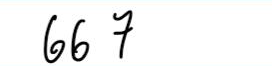

In [9]:
model_upload = load_model("C:/Users/xuxia/OneDrive/Desktop/ee628-final-project/model")
img = Image.open('testimage3.jpg')
data = asarray(img)
width, height = img.size
line_list = [0]
for i in range(len(data)):
    if white_judge(data[i][0]) == False:
        line_list.append(i)
line_list = combine_line(line_list)
line_list.append(len(data))
# Cut Image at y_Axis
img_list = []
left = 0
right = width - 1

for i in range(len(line_list)-1):
    top = line_list[i]+2
    bot = line_list[i+1]-1
    new_img = img.crop((left, top, right, bot))
    img_list.append([])
    img_list[i].append(new_img)
    
img_list[9][0]

In [10]:
# Cut Image at X_Axis
for i in range(len(img_list)):
    img2 = img_list[i][0]
    img2_list = img_split_X(img2)
    img_list[i].append(img2_list)
img_list[9][1][2]

new_line_start
[7]
new_line_start
[6]
new_line_start
[5]
new_line_start
[3]
new_line_start
[6]
[7]
new_line_start
[8]
[8]
new_line_start
[9]
[6]
new_line_start
[9]
[9]
new_line_start
[6]
[6]
[7]
new_line_start
[8]
[1]
[3]


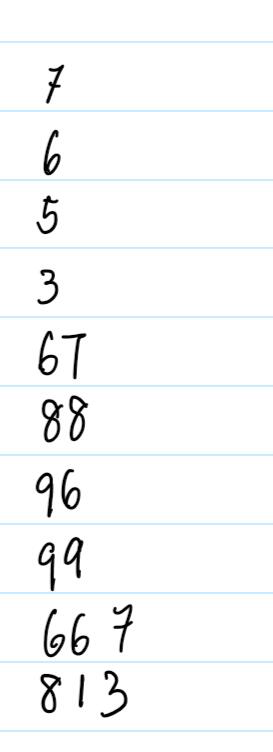

In [11]:
prediction = []
for k in range(len(img_list)-1):
    if k != 0:
        prediction.append([])
        # prcossion image to shape (1,28,28,1)
        for l in range(len(img_list[k][1])):
            timg = img_list[k][1][l]
            timg = img_to_array(timg)
            timg_p = np.zeros((28, 28, 1))
            for i in range (len(timg_p[0])):
                for j in range(len(timg_p[i])):
                    rbg = (timg[i][j][0] + timg[i][j][1] + timg[i][j][2])/3
                    if deep_judge(timg[i][j]) == False:
                        timg_p[i][j][0] = 1 - rbg/255
                    if deep_judge(timg[i][j]) == True:
                        timg_p[i][j][0] = 0
            timg_p = np.expand_dims(timg_p, axis=0)
            #prediction
            predict = model_upload.predict_classes(timg_p)
            prediction[k-1].append(predict)
            
for i in range(len(prediction)):
    print("new_line_start")
    for j in range(len(prediction[i])):
        print(prediction[i][j])
img

In [12]:
#score calculator
correct_answer = [7,6,5,5,67,88,96,99,667,813]
student_answer = []
for i in range(len(prediction)):
    number = 0
    ten = 0
    for j in range(len(prediction[i])):
        add_num = prediction[i][len(prediction[i])-(j+1)]
        if ten>0:
            for k in range(ten):
                add_num = add_num*10
        number += add_num
        ten +=1
    student_answer.append(number)   
score = 0

for i in range(len(correct_answer)):
    if correct_answer[i] == student_answer[i]:
        score += 10
score
    

90

10 answers, 9 correct, 1 wrong

# Some more test 

new_line_start
[5]
new_line_start
[4]
new_line_start
[3]
new_line_start
[6]
new_line_start
[7]


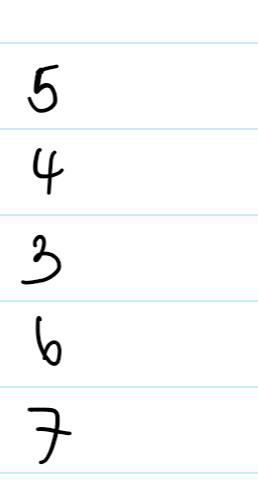

In [13]:
# More example for classification
img = Image.open('testimage1.jpg')
data = asarray(img)
width, height = img.size
line_list = [0]
for i in range(len(data)):
    if white_judge(data[i][0]) == False:
        line_list.append(i)
line_list = combine_line(line_list)
line_list.append(len(data))
# Cut Image at y_Axis
img_list = []
left = 0
right = width - 1

for i in range(len(line_list)-1):
    top = line_list[i]+2
    bot = line_list[i+1]-1
    new_img = img.crop((left, top, right, bot))
    img_list.append([])
    img_list[i].append(new_img)

# Cut Image at X_Axis
for i in range(len(img_list)):
    img2 = img_list[i][0]
    img2_list = img_split_X(img2)
    img_list[i].append(img2_list)

prediction = []
for k in range(len(img_list)-1):
    if k != 0:
        prediction.append([])
        # prcossion image to shape (1,28,28,1)
        for l in range(len(img_list[k][1])):
            timg = img_list[k][1][l]
            timg = img_to_array(timg)
            timg_p = np.zeros((28, 28, 1))
            for i in range (len(timg_p[0])):
                for j in range(len(timg_p[i])):
                    rbg = (timg[i][j][0] + timg[i][j][1] + timg[i][j][2])/3
                    if deep_judge(timg[i][j]) == False:
                        timg_p[i][j][0] = 1 - rbg/255
                    if deep_judge(timg[i][j]) == True:
                        timg_p[i][j][0] = 0
            timg_p = np.expand_dims(timg_p, axis=0)
            #prediction
            predict = model_upload.predict_classes(timg_p)
            prediction[k-1].append(predict)
            
for i in range(len(prediction)):
    print("new_line_start")
    for j in range(len(prediction[i])):
        print(prediction[i][j])
img

new_line_start
[1]
new_line_start
[8]
new_line_start
[3]
new_line_start
[9]
new_line_start
[6]


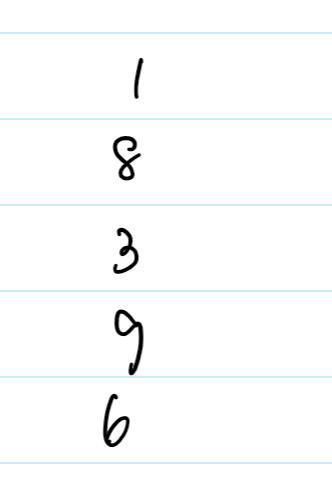

In [14]:
# More example for classification
img = Image.open('testimage2.jpg')
data = asarray(img)
width, height = img.size
line_list = [0]
for i in range(len(data)):
    if white_judge(data[i][0]) == False:
        line_list.append(i)
line_list = combine_line(line_list)
line_list.append(len(data))
# Cut Image at y_Axis
img_list = []
left = 0
right = width - 1

for i in range(len(line_list)-1):
    top = line_list[i]+2
    bot = line_list[i+1]-1
    new_img = img.crop((left, top, right, bot))
    img_list.append([])
    img_list[i].append(new_img)

# Cut Image at X_Axis
for i in range(len(img_list)):
    img2 = img_list[i][0]
    img2_list = img_split_X(img2)
    img_list[i].append(img2_list)

prediction = []
for k in range(len(img_list)-1):
    if k != 0:
        prediction.append([])
        # prcossion image to shape (1,28,28,1)
        for l in range(len(img_list[k][1])):
            timg = img_list[k][1][l]
            timg = img_to_array(timg)
            timg_p = np.zeros((28, 28, 1))
            for i in range (len(timg_p[0])):
                for j in range(len(timg_p[i])):
                    rbg = (timg[i][j][0] + timg[i][j][1] + timg[i][j][2])/3
                    if deep_judge(timg[i][j]) == False:
                        timg_p[i][j][0] = 1 - rbg/255
                    if deep_judge(timg[i][j]) == True:
                        timg_p[i][j][0] = 0
            timg_p = np.expand_dims(timg_p, axis=0)
            #prediction
            predict = model_upload.predict_classes(timg_p)
            prediction[k-1].append(predict)
            
for i in range(len(prediction)):
    print("new_line_start")
    for j in range(len(prediction[i])):
        print(prediction[i][j])
img

new_line_start
[6]
[2]
[7]
new_line_start
[6]
[3]
new_line_start
[4]
[5]
new_line_start
[9]
[9]
new_line_start
[8]
[8]
new_line_start
[1]
[2]
new_line_start
[7]
[4]


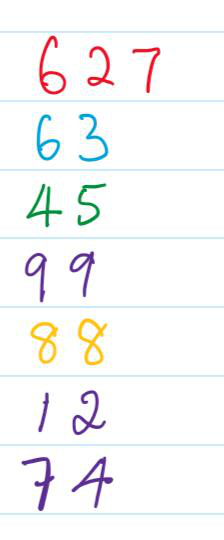

In [18]:
# More example for classification
img = Image.open('testimage4.jpg')
data = asarray(img)
width, height = img.size
line_list = [0]
for i in range(len(data)):
    if white_judge(data[i][0]) == False:
        line_list.append(i)
line_list = combine_line(line_list)
line_list.append(len(data))
# Cut Image at y_Axis
img_list = []
left = 0
right = width - 1

for i in range(len(line_list)-1):
    top = line_list[i]+2
    bot = line_list[i+1]-1
    new_img = img.crop((left, top, right, bot))
    img_list.append([])
    img_list[i].append(new_img)

# Cut Image at X_Axis
for i in range(len(img_list)):
    img2 = img_list[i][0]
    img2_list = img_split_X(img2)
    img_list[i].append(img2_list)

prediction = []
for k in range(len(img_list)-1):
    if k != 0:
        prediction.append([])
        # prcossion image to shape (1,28,28,1)
        for l in range(len(img_list[k][1])):
            timg = img_list[k][1][l]
            timg = img_to_array(timg)
            timg_p = np.zeros((28, 28, 1))
            for i in range (len(timg_p[0])):
                for j in range(len(timg_p[i])):
                    rbg = (timg[i][j][0] + timg[i][j][1] + timg[i][j][2])/3
                    if deep_judge(timg[i][j]) == False:
                        timg_p[i][j][0] = 1 - rbg/255
                    if deep_judge(timg[i][j]) == True:
                        timg_p[i][j][0] = 0
            timg_p = np.expand_dims(timg_p, axis=0)
            #prediction
            predict = model_upload.predict_classes(timg_p)
            prediction[k-1].append(predict)
            
for i in range(len(prediction)):
    print("new_line_start")
    for j in range(len(prediction[i])):
        print(prediction[i][j])
img